# Battle of Neighborhoods

## Introduction

New York City the largest and most influential American metropolis, encompassing Manhattan and Staten islands, the western sections of Long Island, and a small portion of the New York state mainland to the north of Manhattan. New York City is in reality a collection of many neighbourhoods scattered among the city’s five boroughs—Manhattan, Brooklyn, the Bronx, Queens, and Staten Island—each exhibiting its own lifestyle. The population consists of representatives of some 200 national groups, making it one of the most ethincally diverse cities in the world.  Therefore, it is safe to say that the cuisine of New York City comprises many cuisines belonging to the various ethnic groups.   

## Problem
Like New York City, the Caribbean Islands comprise people from the world over.  The various waves of migration have formed a truly unique blend of cuisines and traditions in the region.  

This project will set out to explore New York City for Caribbean Restaurants. The resulting information can be used by persons wishing to enjoy Caribbean Islands cuisine in New York City. 

### Data Sources

New York Neighborhood Data set -

Data source : https://cocl.us/new_york_dataset

The data will be collected/acquired from the Foursquare API  -

Data source : Foursquare https://enterprise.foursquare.com/products/places

### Methodology

The Methodology section will describe the main components of our analysis. 

Collect the data from the various sources as mentioned above - New York neighborhood data from https://cocl.us/new_york_dataset

We will access and filter the data through FourSquare API interface and arrange them as a dataframe for visualization.  Foursquare https://enterprise.foursquare.com/products/places

Acquire the tips and from that get the rating of the restaurants in the neighborhood of New York.

Collect Data After importing the necessary libraries as follows:

## Explore and Understand Data

### Import necessary Libraries

In [1]:
get_ipython().system(u' pip install --upgrade pip')
get_ipython().system(u' pip install beautifulsoup4')
!pip install lxml
!pip install html5lib
!pip install requests

     |████████████████████████████████| 1.4MB 15.5MB/s eta 0:00:01
  Found existing installation: pip 19.1.1
    Uninstalling pip-19.1.1:
      Successfully uninstalled pip-19.1.1
     |████████████████████████████████| 106 kB 9.1 MB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB 6.9 MB/s eta 0:00:01


In [2]:
import numpy as np 
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

!conda install -c conda-forge geopy --yes

import json
from geopy.geocoders import Nominatim

import requests
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors


from sklearn.cluster import KMeans

import folium
print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    scikit-learn-0.20.1        |   py36h22eb022_0         5.7 MB
    liblapack-3.8.0            |      11_openblas          10 KB  conda-forge
    numpy-1.18.1               |   py36h95a1406_0         5.2 MB  conda-forge
    liblapacke-3.8.0           |      11_openblas          10 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    libopenblas-0.3.6          |       h5a2b251_2         7.7 MB
    sci

**Define function to create a data set about New York from the acquired data.**

In [3]:
def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
    
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
    return new_york_data

In [4]:
df_ny = get_new_york_data()

In [5]:
df_ny.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [6]:
df_ny.shape

(306, 4)

In [7]:
df_ny[df_ny['Neighborhood']=='Woodlawn']

,Borough,Neighborhood,Latitude,Longitude
7,Bronx,Woodlawn,40.898273,-73.867315


**Explore the various boroughs and neighborhoods using a bar chart in New York**

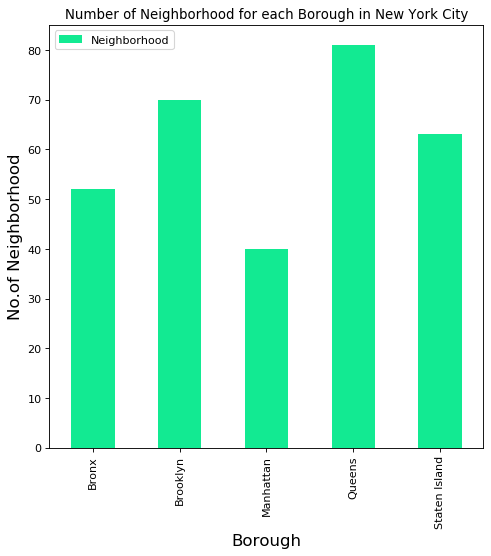

In [8]:
plt.figure(figsize=(7,7), dpi = 80)
# title
plt.title('Number of Neighborhood for each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)
#giving a bar plot
df_ny.groupby('Borough')['Neighborhood'].count().plot(kind='bar', color='#12EA92')
#legend
plt.legend()
#displays the plot
plt.show()

**Define function for acquiring the latitude and longitude from the provided location**

In [9]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

**Define a function to get the details of the venue by accessing the Foursquare API**

In [11]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude


def get_venues(lat,lng):
    #set variables
    radius=1000
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    return new_york_data

**Get a list of the Caribbean Restaurants in the New York**

In [12]:
vns = get_venues(40.898273,-73.867315)
vns[vns['Category']=='Caribbean Restaurant']

,ID,Name,Category
14,4c9e50e38afca09379b2ff15,Ali's Roti Shop,Caribbean Restaurant


In [13]:
car_res = vns[vns['Category']=='Caribbean Restaurant'].values.tolist()
car_res

[['4c9e50e38afca09379b2ff15', "Ali's Roti Shop", 'Caribbean Restaurant']]

In [14]:
len(vns[vns['Category']=='Caribbean Restaurant'].values.tolist()) > 0

True

In [15]:
for row in df_ny.values.tolist():
    print(row)

['Bronx', 'Wakefield', 40.89470517661, -73.84720052054902]
['Bronx', 'Co-op City', 40.87429419303012, -73.82993910812398]
['Bronx', 'Eastchester', 40.887555677350775, -73.82780644716412]
['Bronx', 'Fieldston', 40.89543742690383, -73.90564259591682]
['Bronx', 'Riverdale', 40.890834493891305, -73.9125854610857]
['Bronx', 'Kingsbridge', 40.88168737120521, -73.90281798724604]
['Manhattan', 'Marble Hill', 40.87655077879964, -73.91065965862981]
['Bronx', 'Woodlawn', 40.89827261213805, -73.86731496814176]
['Bronx', 'Norwood', 40.87722415599446, -73.8793907395681]
['Bronx', 'Williamsbridge', 40.88103887819211, -73.85744642974207]
['Bronx', 'Baychester', 40.866858107252696, -73.83579759808117]
['Bronx', 'Pelham Parkway', 40.85741349808865, -73.85475564017999]
['Bronx', 'City Island', 40.84724670491813, -73.78648845267413]
['Bronx', 'Bedford Park', 40.870185164975325, -73.8855121841913]
['Bronx', 'University Heights', 40.85572707719664, -73.9104159619131]
['Bronx', 'Morris Heights', 40.847897926

In [16]:
# prepare neighborhood list of Caribbean restaurants
column_names=['Borough', 'Neighborhood', 'ID','Name']
caribbean_rest_ny=pd.DataFrame(columns=column_names)

print('Caribbean restaurants in\n---------------------')
       
for row in df_ny.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    caribbean_restaurants=venues[venues['Category']=='Caribbean Restaurant']
    if len(caribbean_restaurants) > 0:
        print(Neighborhood+', '+Borough+' : '+str(len(caribbean_restaurants)))
    for restaurant_detail in caribbean_restaurants.values.tolist():
        id, name , category=restaurant_detail
        caribbean_rest_ny = caribbean_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)

print('Completed buildining the Caribbean restaurants data set')

Caribbean restaurants in
---------------------
Wakefield, Bronx : 4
Co-op City, Bronx : 2
Eastchester, Bronx : 5
Kingsbridge, Bronx : 1
Marble Hill, Manhattan : 1
Woodlawn, Bronx : 1
Norwood, Bronx : 2
Williamsbridge, Bronx : 8
Baychester, Bronx : 1
Bedford Park, Bronx : 1
Fordham, Bronx : 1
High  Bridge, Bronx : 1
Morrisania, Bronx : 1
Parkchester, Bronx : 3
Van Nest, Bronx : 2
Belmont, Bronx : 1
Olinville, Bronx : 3
Pelham Gardens, Bronx : 2
Concourse, Bronx : 1
Unionport, Bronx : 1
Edenwald, Bronx : 4
Flatbush, Brooklyn : 9
Crown Heights, Brooklyn : 5
East Flatbush, Brooklyn : 4
Kensington, Brooklyn : 1
Prospect Heights, Brooklyn : 1
Brownsville, Brooklyn : 2
Bushwick, Brooklyn : 1
Bedford Stuyvesant, Brooklyn : 4
Fort Greene, Brooklyn : 1
Park Slope, Brooklyn : 1
East New York, Brooklyn : 1
Starrett City, Brooklyn : 1
Canarsie, Brooklyn : 5
Flatlands, Brooklyn : 5
Coney Island, Brooklyn : 2
Marine Park, Brooklyn : 1
Clinton Hill, Brooklyn : 1
Downtown, Brooklyn : 1
Prospect Leffert

In [17]:
caribbean_rest_ny.head()

,Borough,Neighborhood,ID,Name
0,Bronx,Wakefield,4d375ce799fe8eec99fd2355,Ripe Kitchen & Bar
1,Bronx,Wakefield,4c9e50e38afca09379b2ff15,Ali's Roti Shop
2,Bronx,Wakefield,4c10f6aece57c92804a682d2,Jackie's West Indian Bakery
3,Bronx,Wakefield,508af256e4b0578944c87392,Cooler Runnings Jamaican Restaurant Inc
4,Bronx,Co-op City,4baab2b0f964a520c7803ae3,Country Thyme Cuisine


**Let's visualize the number of caribbean restaurants in each borough in New York city**

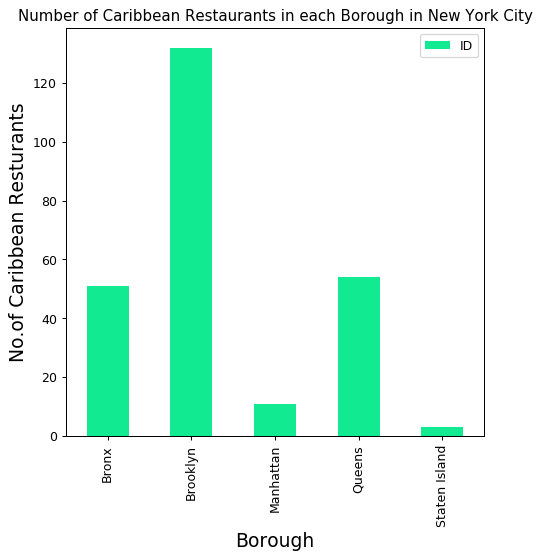

In [18]:
plt.figure(figsize=(6,6), dpi = 90)
# title
plt.title('Number of Caribbean Restaurants in each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Caribbean Resturants', fontsize=15)
#giving a bar plot
caribbean_rest_ny.groupby('Borough')['ID'].count().plot(kind='bar', color='#12EA92')
#legend
plt.legend()
#displays the plot
plt.show()

**Now visualize the same for Top 15 neighborhoods based on the number of Caribbean restaurants in New York city**

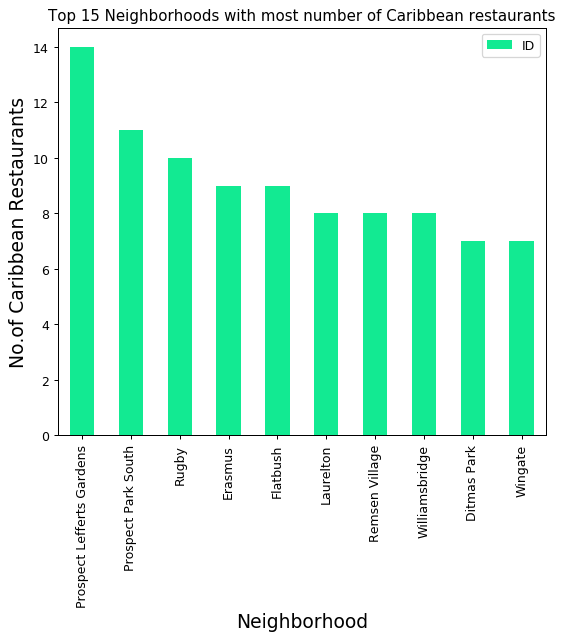

In [19]:
plt.figure(figsize=(7,6), dpi = 90)
# title
plt.title('Top 15 Neighborhoods with most number of Caribbean restaurants')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Caribbean Restaurants', fontsize=15)
#giving a bar plot
caribbean_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(10).plot(kind='bar', color='#12EA92')
#legend
plt.legend()
#displays the plot
plt.show()

It looks like Prospect Lefferts Garden has the highest number of Caribbean restaurants in New York city.

In [20]:
caribbean_rest_ny[caribbean_rest_ny['Neighborhood']=='Prospect Lefferts Gardens']

,Borough,Neighborhood,ID,Name
92,Brooklyn,Prospect Lefferts Gardens,4a6cba95f964a52073d11fe3,Peppa's Jerk Chicken
93,Brooklyn,Prospect Lefferts Gardens,4bdcade72a3a0f470fecb3b6,MangoSeed Restaurant
94,Brooklyn,Prospect Lefferts Gardens,4d0e9e455b8a8cfa5e50eb83,De Hot Pot Roti Shop
95,Brooklyn,Prospect Lefferts Gardens,4c79b5f683a7bfb7527f7ff8,Errol's Caribbean Bakery
96,Brooklyn,Prospect Lefferts Gardens,54fbad6b498e83b622d3c796,The Food Sermon
97,Brooklyn,Prospect Lefferts Gardens,4e0904426284d9ee92de668b,Golden Krust Caribbean Restaurant
98,Brooklyn,Prospect Lefferts Gardens,4b085b46f964a520f50923e3,Gloria's
99,Brooklyn,Prospect Lefferts Gardens,4bd3475c046076b084a97571,Culpepper's
100,Brooklyn,Prospect Lefferts Gardens,4e26eebed16486291ba4d622,Jen's Roti Shop
101,Brooklyn,Prospect Lefferts Gardens,4cd4918576ab721eacf3676a,Soldiers Jamaican


**We are utilizing the Foursquare API to explore the neighborhoods**

In [21]:
# prepare neighborhood list of Caribbean restaurants
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
caribbean_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1


for row in caribbean_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these restaurants as they may have been 
        #recently opened or details do not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(caribbean_rest_ny),')','processed')
    caribbean_rest_stats_ny = caribbean_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

{'meta': {'code': 200, 'requestId': '5e5dba466d8c56001bf757c7'}, 'response': {'venue': {'id': '4d375ce799fe8eec99fd2355', 'name': 'Ripe Kitchen & Bar', 'contact': {'phone': '9146657689', 'formattedPhone': '(914) 665-7689'}, 'location': {'address': '151 W Sandford Blvd', 'crossStreet': 'South 11th Avenue', 'lat': 40.898151685683544, 'lng': -73.83887499584462, 'labeledLatLngs': [{'label': 'display', 'lat': 40.898151685683544, 'lng': -73.83887499584462}], 'postalCode': '10550', 'cc': 'US', 'neighborhood': 'South Side', 'city': 'Mount Vernon', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['151 W Sandford Blvd (South 11th Avenue)', 'Mount Vernon, NY 10550', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/ripe-kitchen--bar/4d375ce799fe8eec99fd2355', 'categories': [{'id': '4bf58dd8d48988d144941735', 'name': 'Caribbean Restaurant', 'pluralName': 'Caribbean Restaurants', 'shortName': 'Caribbean', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cari

KeyError: 'venue'

In [22]:
caribbean_rest_stats_ny.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,Wakefield,4d375ce799fe8eec99fd2355,Ripe Kitchen & Bar,70,8.7,33
1,Bronx,Wakefield,4c9e50e38afca09379b2ff15,Ali's Roti Shop,16,8.5,9
2,Bronx,Wakefield,4c10f6aece57c92804a682d2,Jackie's West Indian Bakery,22,7.5,13
3,Bronx,Wakefield,508af256e4b0578944c87392,Cooler Runnings Jamaican Restaurant Inc,7,6.6,4
4,Bronx,Co-op City,4baab2b0f964a520c7803ae3,Country Thyme Cuisine,18,7.9,7


In [23]:
caribbean_rest_stats_ny.shape

(50, 7)

In [24]:
caribbean_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
Borough         50 non-null object
Neighborhood    50 non-null object
ID              50 non-null object
Name            50 non-null object
Likes           50 non-null object
Rating          50 non-null float64
Tips            50 non-null object
dtypes: float64(1), object(6)
memory usage: 2.9+ KB


In [25]:
convert_types = { 'Likes': float, 'Tips': float }
caribbean_rest_stats_ny = caribbean_rest_stats_ny.astype(convert_types)
caribbean_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
Borough         50 non-null object
Neighborhood    50 non-null object
ID              50 non-null object
Name            50 non-null object
Likes           50 non-null float64
Rating          50 non-null float64
Tips            50 non-null float64
dtypes: float64(3), object(4)
memory usage: 2.9+ KB


Restaurant with most tips

In [26]:
caribbean_rest_stats_ny.iloc[caribbean_rest_stats_ny['Tips'].idxmax()]

Borough                            Bronx
Neighborhood                 Kingsbridge
ID              4bd8e98811dcc928f865f833
Name                          El Malecon
Likes                                 62
Rating                               8.4
Tips                                  34
Name: 11, dtype: object

Highly rated Restaurant

In [27]:
caribbean_rest_stats_ny.iloc[caribbean_rest_stats_ny['Rating'].idxmax()]

Borough                            Bronx
Neighborhood                   Wakefield
ID              4d375ce799fe8eec99fd2355
Name                  Ripe Kitchen & Bar
Likes                                 70
Rating                               8.7
Tips                                  33
Name: 0, dtype: object

Most Liked Restaurant

In [28]:
caribbean_rest_stats_ny.iloc[caribbean_rest_stats_ny['Likes'].idxmax()]

Borough                         Brooklyn
Neighborhood                    Flatbush
ID              4be5ad3a2457a5932fd0ab15
Name                    Fisherman's Cove
Likes                                 74
Rating                               8.6
Tips                                  18
Name: 48, dtype: object

**Let's create a dataset with the average rating of the restaurants in the particular neighborhood of New York city**

In [29]:
ny_neighborhood_stats=caribbean_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']

**The Top 10 neighborhoods in order of average rating of Caribbean restaurants**

In [30]:
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
21,Woodlawn,8.500000
10,Kingsbridge,8.400000
11,Marble Hill,8.400000
7,Flatbush,7.975000
19,Wakefield,7.825000
9,High Bridge,7.800000
18,Van Nest,7.400000
15,Parkchester,7.333333
3,Co-op City,7.200000
17,Unionport,7.200000


**Boroughs sorted with high average rating of Caribbean restaurants in New York city**

In [31]:
ny_borough_stats=caribbean_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']

In [32]:
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
2,Manhattan,8.400000
1,Brooklyn,7.975000
0,Bronx,6.835556


**Let's visualize this ratings data on a bar chart**

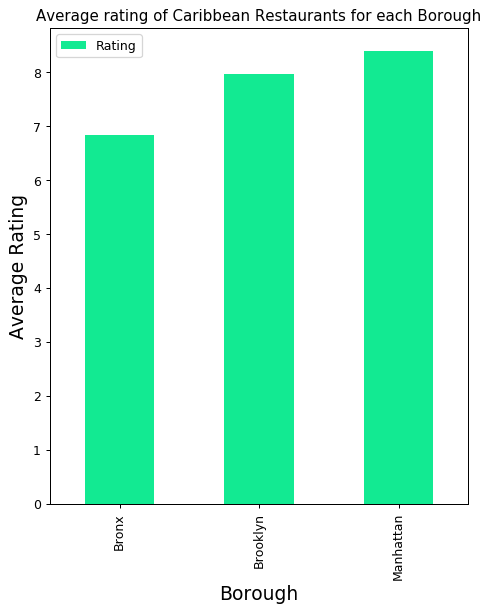

In [33]:
plt.figure(figsize=(6,7), dpi = 90)
# title
plt.title('Average rating of Caribbean Restaurants for each Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('Average Rating', fontsize=15)
#giving a bar plot
caribbean_rest_stats_ny.groupby('Borough').mean()['Rating'].plot(kind='bar', color='#12EA92')
#legend
plt.legend()
#displays the plot
plt.show()

**List of neighborhoods with average rating greater than or equal to 8 for Caribbean restaurants**

In [34]:
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=8.0]

In [35]:
ny_neighborhood_stats

,Neighborhood,Average Rating
10,Kingsbridge,8.4
11,Marble Hill,8.4
21,Woodlawn,8.5


In [36]:
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,df_ny, on='Neighborhood')

In [37]:
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]

In [38]:
ny_neighborhood_stats

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Bronx,Kingsbridge,40.881687,-73.902818,8.4
1,Manhattan,Marble Hill,40.876551,-73.910660,8.4
2,Bronx,Woodlawn,40.898273,-73.867315,8.5


In [39]:
# create map and display it
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)

In [40]:
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='#EA1253',
            fill=True,
            fill_color='#12EA92',
            fill_opacity=0.4
        )
    )

In [41]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'

In [42]:
# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add incidents to map
ny_map.add_child(incidents)

## Results
Based on the Data Analysis and Visualization, we can conclude the following:

- The Caribbean restaurants in the Bronx and Manhattan are highly rated (greater or equal to 8.0)

- The Borough with the highest number of Caribbean restaurants is Brooklyn
    
- The neighborhood in Brooklyn with most number of Caribbean restaurants is Prospect Lefferts Gardens
    
- The Borough of Staten Island has the least number of Caribbean restaurants

- The Caribbean restaurants in Woodland, Bronx is the highest rated

Thank you, Coursera!